# Physical implementation of E-comm

In [2]:
import psycopg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
from IPython.display import Image

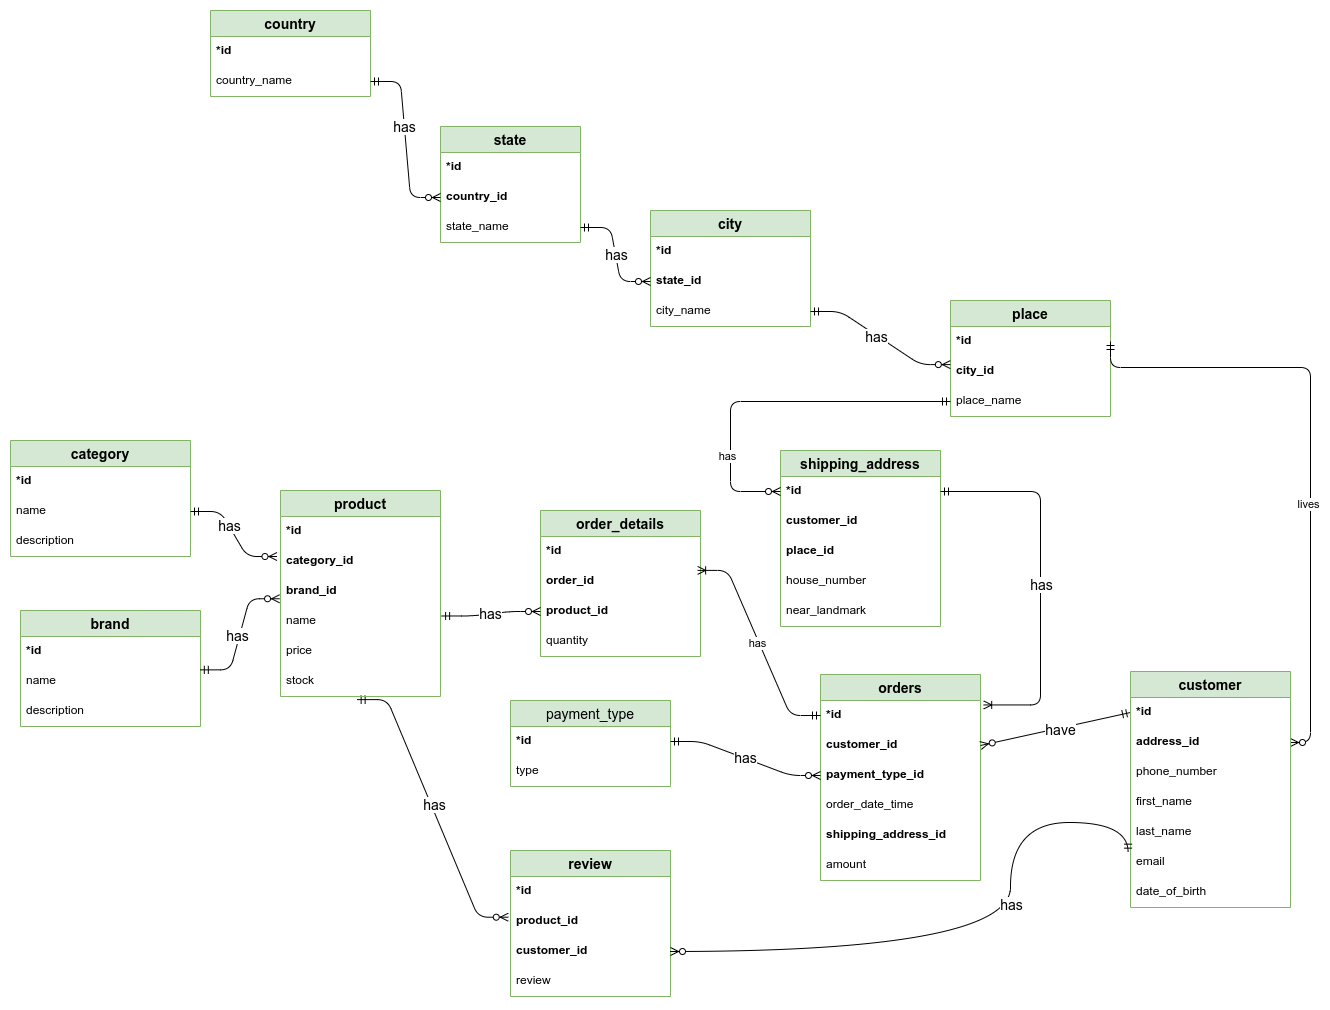

In [3]:
Image("E-comm Logical_ER.drawio .png")

In [2]:
def connect():
    connection = psycopg2.connect(user="postgres",
                                  password="admin",
                                  host="localhost",
                                  port="5432",
                                  )
    connection.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT);
    return connection

## Creating Database e_comm

In [3]:
try:
    connection = connect()
    query = "CREATE DATABASE e_comm;"
    
    
    cursor = connection.cursor()
    
    # Executing a SQL query
    cursor.execute(query)
    print("Database sucessfully created")
except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)
finally:
    if (connection):
        cursor.close()
        connection.close()
        print('')
        print("PostgreSQL connection is closed")

Database sucessfully created

PostgreSQL connection is closed


#### Defining connect() method so we can we it laster through out our code

In [4]:
#Defining connect() method so we can we it laster through out our code to connect to the database
def connect():
    connection = psycopg2.connect(user="postgres",
                                  password="admin",
                                  host="localhost",
                                  port="5432",
                                  database="e_comm")
    
    return connection

### Creating tables in the database e_comm

In [13]:
import logging
try:
    connection = connect()
    
    cursor = connection.cursor()
    
    query_1 = '''
    CREATE TABLE category (
    id SERIAL PRIMARY KEY,
    name TEXT,
    description TEXT
    )
    '''
    cursor.execute(query_1)
    
    query_2 = '''
    CREATE TABLE brand (
    id SERIAL PRIMARY KEY,
    name TEXT,
    description TEXT
    )
    '''
    cursor.execute(query_2)
    
    query_3 = '''
    CREATE TABLE product (
    id SERIAL PRIMARY KEY,
    name TEXT,
    price MONEY,
    category_id INTEGER , 
    brand_id INTEGER,
    stock BOOLEAN,
    
    CONSTRAINT fk_product_category
    FOREIGN KEY(category_id) REFERENCES category(id),
    
    CONSTRAINT fk_product_brand
    FOREIGN KEY(brand_id) REFERENCES brand(id)
    
    )
    '''
    cursor.execute(query_3)
    
    query_4 = '''
    CREATE TABLE country (
    id SERIAL PRIMARY KEY,
    country_name TEXT
    )
    '''
    cursor.execute(query_4)
    
    query_5 = '''
    CREATE TABLE state (
    id SERIAL PRIMARY KEY,
    state_name TEXT,
    country_id INTEGER,
    
    CONSTRAINT fk_state_country
    FOREIGN KEY(country_id) REFERENCES country(id)
    )
    '''
    cursor.execute(query_5)
    
    query_6 = '''
    CREATE TABLE city (
    id SERIAL PRIMARY KEY,
    city_name TEXT,
    state_id INTEGER,
    
    CONSTRAINT fk_city_state
    FOREIGN KEY(state_id) REFERENCES state(id)
    )
    '''
    cursor.execute(query_6)
    
    query_7 = '''
    CREATE TABLE place (
    id SERIAL PRIMARY KEY,
    place_name TEXT,
    city_id INTEGER,
    
    CONSTRAINT fk_street_city
    FOREIGN KEY(city_id) REFERENCES city(id)
    )
    '''
    cursor.execute(query_7)
    
    
    query_8 = '''
    CREATE TABLE customer (
    id SERIAL PRIMARY KEY,
    address_id INTEGER,
    phone_number BIGINT,
    first_name TEXT,
    last_name TEXT,
    email TEXT,
    date_of_birth DATE,
    
    CONSTRAINT fk_customer_address_id
    FOREIGN KEY(address_id) REFERENCES place(id)
    
    )
    '''
    cursor.execute(query_8)
    
    
    query_9 = '''
    CREATE TABLE shipping_address (
    id SERIAL PRIMARY KEY,
    house_number TEXT,
    near_landmark TEXT,
    customer_id INTEGER,
    place_id INTEGER,
    
    CONSTRAINT fk_shiping_address_customer
    FOREIGN KEY(customer_id) REFERENCES customer(id),
    
    CONSTRAINT fk_shipping_address
    FOREIGN KEY(place_id) REFERENCES place(id)
    )
    '''
    cursor.execute(query_9)
    
    query_10 = '''
    CREATE TABLE payment_type (
    id SERIAL PRIMARY KEY,
    type TEXT
    )
    '''
    cursor.execute(query_10)
    
    query_11 = '''
    CREATE TABLE orders (
    id SERIAL PRIMARY KEY,
    customer_id INTEGER,
    payment_type_id INTEGER,
    order_date_time TIMESTAMP,
    shipping_address_id INTEGER,
    amount MONEY,
    
    CONSTRAINT fk_order_customer
    FOREIGN KEY(customer_id) REFERENCES customer(id),
    
    CONSTRAINT fk_order_payment_type
    FOREIGN KEY(payment_type_id) REFERENCES payment_type(id),
    
    CONSTRAINT fk_order_shipping_address
    FOREIGN KEY(shipping_address_id) REFERENCES shipping_address(id)
    
    )
    '''
    cursor.execute(query_11)
    
    query_12 = '''
    CREATE TABLE order_details (
    id SERIAL PRIMARY KEY,
    order_id INTEGER,
    product_id INTEGER,
    quantity SMALLINT,
    
    CONSTRAINT fk_order_details_order
    FOREIGN KEY(order_id) REFERENCES orders(id),
    
    CONSTRAINT fk_order_details_product
    FOREIGN KEY(product_id) REFERENCES product(id)
    )
    '''
    cursor.execute(query_12)
    
    query_13 = '''
    CREATE TABLE review (
    id SERIAL PRIMARY KEY,
    product_id INTEGER,
    customer_id INTEGER,
    review TEXT,
    
    CONSTRAINT fk_review_customer
    FOREIGN KEY(customer_id) REFERENCES customer(id),
    
    CONSTRAINT fk_review_product
    FOREIGN KEY(product_id) REFERENCES product(id)
    )
    '''
    cursor.execute(query_13)
    
    
    connection.commit()
    
    
    
    print("Tables sucessfully created")
except (Exception,psycopg2.Error) as error:
    #print("Error while connecting to PostgresSQL: ",error)
    #print(error)
    logging.debug("An exception was thrown!", exc_info=True)
    logging.info("An exception was thrown!", exc_info=True)
    logging.warning("An exception was thrown!", exc_info=True)
finally:
    if(connection):
        cursor.close()
        connection.close()
        print('')
        print("PostgreSQL connection is closed")

Tables sucessfully created

PostgreSQL connection is closed


### Populating the database with data

In [6]:
import pandas as pd

In [15]:
tables = ['category','brand','product','country','state','city','place','customer','shipping_address','payment_type','orders','order_details','review']

In [16]:

connection=connect()
cursor = connection.cursor()

try:
    for table in tables:
        df = pd.read_excel ('data for E-comm.xlsx',sheet_name=table)
        for columns in df.columns:
            #print(columns)
            try:
                if df[columns].dtypes =='float':
                    print(str(columns))
                    df[columns]=df[columns].astype('int32')
            except:
                print(str(columns))
                pass

        data = [list(x) for x in df.itertuples(index=False)]
        query = "INSERT INTO " + str(table)+" VALUES(" +'%s'+',%s'*(len(df.columns)-1) + ');'

        print(query)
        for item in data:
            to_push=item
            for i,ele in enumerate(item):
                if str(ele)=='nan':
                    to_push[i]=None
                    
            cursor.execute(query,to_push)
            connection.commit()
        print("Data sucessufully inserted of table "+str(table))
        
except(Exception,psycopg2.Error) as e:
    print(e)
    logging.debug("An exception was thrown!", exc_info=True)
    logging.info("An exception was thrown!", exc_info=True)
    logging.warning("An exception was thrown!", exc_info=True)

finally:
    if(connection):
        cursor.close()
        print('')
        print("PostgreSQL connection is closed")

id
INSERT INTO category VALUES(%s,%s,%s);
Data sucessufully inserted of table category
id
INSERT INTO brand VALUES(%s,%s,%s);
Data sucessufully inserted of table brand
id
price
category_id
brand_id
INSERT INTO product VALUES(%s,%s,%s,%s,%s,%s);
Data sucessufully inserted of table product
id
INSERT INTO country VALUES(%s,%s);
Data sucessufully inserted of table country
id
state_name
country
INSERT INTO state VALUES(%s,%s,%s);
Data sucessufully inserted of table state
id
state_name
INSERT INTO city VALUES(%s,%s,%s);
Data sucessufully inserted of table city
id
city_id
INSERT INTO place VALUES(%s,%s,%s);
Data sucessufully inserted of table place
id
address_id
phone_number
INSERT INTO customer VALUES(%s,%s,%s,%s,%s,%s,%s);
Data sucessufully inserted of table customer
id
customer_id
place_id
INSERT INTO shipping_address VALUES(%s,%s,%s,%s,%s);
Data sucessufully inserted of table shipping_address
id
INSERT INTO payment_type VALUES(%s,%s);
Data sucessufully inserted of table payment_type
id
cu

#### LOOKING AT THE DATA

#### List of all the orders

In [28]:
try:
    conn =connect()
    cur = conn.cursor()
    query = '''

    SELECT * FROM
    orders

    '''
    cur.execute(query)
    col = [desc[0] for desc in cur.description]  

    df=pd.DataFrame(columns=col,data=cur.fetchall())
    df
except(Exception) as e:
    print(e)
finally:
    if(conn):
        cur.close()
        conn.close()
        print("connection closed")
df

connection closed


,id,customer_id,payment_type_id,order_date_time,shipping_address_id,amount
0,1,1,1,2021-04-24 11:00:00,1,"रू 20,000.00"
1,2,2,1,2021-04-24 12:00:00,2,"रू 20,000.00"
2,3,1,1,2021-04-24 09:00:00,4,"रू 20,000.00"
3,4,2,2,2021-06-24 09:00:00,5,"रू 20,000.00"
4,5,3,3,2021-04-24 11:00:00,3,"रू 20,000.00"
5,6,4,2,2021-08-24 15:00:00,8,"रू 20,000.00"
6,7,5,2,2021-06-24 14:00:00,6,"रू 20,000.00"
7,8,5,1,2021-09-24 06:00:00,6,"रू 20,000.00"
8,9,6,1,2021-06-24 12:00:00,7,"रू 20,000.00"


#### All the orders and customer details

In [19]:
try:
    conn =connect()
    cur = conn.cursor()
    query = '''

    SELECT * FROM
    orders
    INNER JOIN customer c
    ON orders.customer_id = c.id

    '''
    cur.execute(query)
    col = [desc[0] for desc in cur.description]  

    df=pd.DataFrame(columns=col,data=cur.fetchall())
    df
except(Exception) as e:
    print(e)
finally:
    if(conn):
        cur.close()
        conn.close()
        print("connection closed")
df

connection closed


,id,customer_id,payment_type_id,order_date_time,shipping_address_id,amount,id,address_id,phone_number,first_name,last_name,email,date_of_birth
0,1,1,1,2021-04-24 11:00:00,1,"रू 20,000.00",1,2,988887655,Hari,D,hari@gmail.com,1998-12-10
1,2,2,1,2021-04-24 12:00:00,2,"रू 20,000.00",2,1,-2147483648,Shaym,P,shyam@gmail.com,1998-12-10
2,3,1,1,2021-04-24 09:00:00,4,"रू 20,000.00",1,2,988887655,Hari,D,hari@gmail.com,1998-12-10
3,4,2,2,2021-06-24 09:00:00,5,"रू 20,000.00",2,1,-2147483648,Shaym,P,shyam@gmail.com,1998-12-10
4,5,3,3,2021-04-24 11:00:00,3,"रू 20,000.00",3,2,-2147483648,Sandesh,timalsina,sandeshtimalsina@gmail.com,1998-12-10
5,6,4,2,2021-08-24 15:00:00,8,"रू 20,000.00",4,1,-2147483648,bikash,jaisawal,b@gmail.com,1998-12-10
6,7,5,2,2021-06-24 14:00:00,6,"रू 20,000.00",5,3,-2147483648,Sailaj,singh,sailaj@gmail.com,1998-12-10
7,8,5,1,2021-09-24 06:00:00,6,"रू 20,000.00",5,3,-2147483648,Sailaj,singh,sailaj@gmail.com,1998-12-10
8,9,6,1,2021-06-24 12:00:00,7,"रू 20,000.00",6,4,-2147483648,Anisha,rai,anisha@gmail.com,1998-12-10


#### List of all the orders from a customer with id=1

In [20]:
try:
    conn =connect()
    cur = conn.cursor()
    query = '''

    SELECT * FROM
    orders
    INNER JOIN customer c
    ON orders.customer_id = c.id
    WHERE c.id=1

    '''
    cur.execute(query)
    col = [desc[0] for desc in cur.description]  

    df=pd.DataFrame(columns=col,data=cur.fetchall())
    df
except(Exception) as e:
    print(e)
finally:
    if(conn):
        cur.close()
        conn.close()
        print("connection closed")
df

connection closed


,id,customer_id,payment_type_id,order_date_time,shipping_address_id,amount,id,address_id,phone_number,first_name,last_name,email,date_of_birth
0,1,1,1,2021-04-24 11:00:00,1,"रू 20,000.00",1,2,988887655,Hari,D,hari@gmail.com,1998-12-10
1,3,1,1,2021-04-24 09:00:00,4,"रू 20,000.00",1,2,988887655,Hari,D,hari@gmail.com,1998-12-10


In [36]:
try:
    conn =connect()
    cur = conn.cursor()
    query = '''

    SELECT c.first_name,c.last_name , p.name ,od.quantity,orders.order_date_time,orders.shipping_address_id FROM
    orders
    INNER JOIN customer c
    ON orders.customer_id = c.id
    INNER JOIN order_details od
    ON orders.id = od.order_id
    
    INNER JOIN product p
    ON od.product_id = p.id
    WHERE od.product_id=1

    '''
    cur.execute(query)
    col = [desc[0] for desc in cur.description]  

    df=pd.DataFrame(columns=col,data=cur.fetchall())
    df
except(Exception) as e:
    print(e)
finally:
    if(conn):
        cur.close()
        conn.close()
        print("connection closed")
df

connection closed


,first_name,last_name,name,quantity,order_date_time,shipping_address_id
0,Hari,D,Nike retro Jordan,4,2021-04-24 11:00:00,1
1,Shaym,P,Nike retro Jordan,2,2021-04-24 12:00:00,2
2,Shaym,P,Nike retro Jordan,1,2021-06-24 09:00:00,5


#### List of all the orders for the product_id =1 (Nike retro Jordan)

In [27]:
try:
    conn =connect()
    cur = conn.cursor()
    query = '''

    SELECT c.first_name,c.last_name , p.name ,od.quantity,orders.order_date_time,
    orders.amount,
    pt.type,
    CONCAT(country.country_name,',',state.state_name,',',city.city_name,',',place.place_name) AS "shipping address",
    s.house_number,s.near_landmark
    FROM orders
    INNER JOIN customer c
    ON orders.customer_id = c.id
    INNER JOIN order_details od
    ON orders.id = od.order_id
    
    INNER JOIN product p
        ON od.product_id = p.id
    INNER JOIN shipping_address AS s
        ON orders.shipping_address_id = s.id
    INNER JOIN place
        ON s.place_id = place.id
    INNER JOIN city
        ON place.city_id=city.id
    INNER JOIN state
        ON city.state_id = state.id
    INNER JOIN country
        on state.country_id = country.id
    INNER JOIN payment_type pt
        ON orders.payment_type_id = pt.id
    WHERE od.product_id=1

    '''
    cur.execute(query)
    col = [desc[0] for desc in cur.description]  

    df=pd.DataFrame(columns=col,data=cur.fetchall())
    df
except(Exception) as e:
    print(e)
finally:
    if(conn):
        cur.close()
        conn.close()
        print("connection closed")
df

connection closed


,first_name,last_name,name,quantity,order_date_time,amount,type,shipping address,house_number,near_landmark
0,Hari,D,Nike retro Jordan,4,2021-04-24 11:00:00,"रू 20,000.00",Cash ON Delivery,"Nepal,3,bhaktapur,sallaghari",12323.0,rangasala
1,Shaym,P,Nike retro Jordan,2,2021-04-24 12:00:00,"रू 20,000.00",Cash ON Delivery,"Nepal,3,kathmandu,baneshwor",123123.0,futsal
2,Shaym,P,Nike retro Jordan,1,2021-06-24 09:00:00,"रू 20,000.00",E-sewa,"Nepal,3,lalitpur,Kupondol",123123RTT,swimming pool


#### Total count of orders by the customer

In [44]:
try:
    conn =connect()
    cur = conn.cursor()
    query = '''

    SELECT CONCAT(c.first_name,' ',c.last_name) AS "customer_name"
    ,COUNT(*) AS "total_number_of_orders"
    FROM orders 
    INNER JOIN customer c
        ON orders.customer_id = c.id
    GROUP BY CONCAT(c.first_name,' ',c.last_name)
    ORDER BY total_number_of_orders DESC
    '''
    cur.execute(query)
    col = [desc[0] for desc in cur.description]  

    df=pd.DataFrame(columns=col,data=cur.fetchall())
    df
except(Exception) as e:
    print(e)
finally:
    if(conn):
        cur.close()
        conn.close()
        print("connection closed")
df

connection closed


,customer_name,total_number_of_orders
0,Sailaj singh,2
1,Shaym P,2
2,Hari D,2
3,bikash jaisawal,1
4,Sandesh timalsina,1
5,Anisha rai,1


### Total count of the payment_type used on the orders

In [48]:
try:
    conn =connect()
    cur = conn.cursor()
    query = '''

    SELECT p.type,COUNT(*) AS "total_payment_type_used_on_order"
    FROM orders
    INNER JOIN payment_type p
        ON orders.payment_type_id = p.id
    GROUP BY p.type
    '''
    cur.execute(query)
    col = [desc[0] for desc in cur.description]  

    df=pd.DataFrame(columns=col,data=cur.fetchall())
    df
except(Exception) as e:
    print(e)
finally:
    if(conn):
        cur.close()
        conn.close()
        print("connection closed")
df

connection closed


,type,total_payment_type_used_on_order
0,Khalti,1
1,Cash ON Delivery,5
2,E-sewa,3
